In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
%matplotlib inline

In [2]:
DIR_PATH = '/Users/perdue/Documents/MINERvA/AI/hdf5/'
f = h5py.File(DIR_PATH + 'hadmultkineimgs_127x94_me1Amc_tiny.hdf5', 'r')

for group in f:
    for dset in f[group]:
        print '{:>10}/{:<16} - {:>8} {}'.format(group, dset, np.dtype(f[group][dset]), np.shape(f[group][dset]))

event_data/eventids         -   uint64 (35, 1)
event_data/eventids_a       -   uint32 (35, 1)
event_data/eventids_b       -   uint32 (35, 1)
event_data/planecodes       -   uint16 (35, 1)
event_data/segments         -    uint8 (35, 1)
event_data/zs               -  float32 (35, 1)
  gen_data/Q2               -  float32 (35, 1)
  gen_data/W                -  float32 (35, 1)
  gen_data/current          -   uint32 (35, 1)
  gen_data/int_type         -   uint32 (35, 1)
  gen_data/targetZ          -   uint32 (35, 1)
  gen_data/x                -  float32 (35, 1)
  gen_data/y                -  float32 (35, 1)
hadro_data/esum_chgdkaons   -  float32 (35, 1)
hadro_data/esum_chgdpions   -  float32 (35, 1)
hadro_data/esum_hadmultmeas -  float32 (35, 1)
hadro_data/esum_neutpions   -  float32 (35, 1)
hadro_data/esum_neutrons    -  float32 (35, 1)
hadro_data/esum_others      -  float32 (35, 1)
hadro_data/esum_protons     -  float32 (35, 1)
hadro_data/n_chgdkaons      -   uint32 (35, 1)
hadro_data/n_

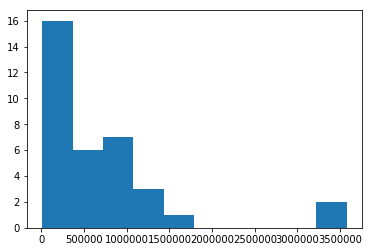

In [3]:
n, bins, patches = plt.hist(f['gen_data']['Q2'][:, 0])

In [6]:
ok_q2_idx = f['gen_data']['Q2'][:, 0] > 0.0
ok_q2_idx

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True], dtype=bool)

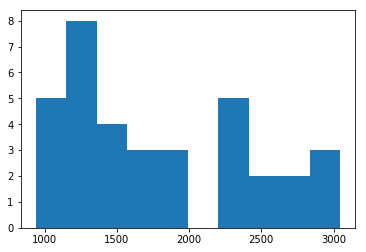

In [7]:
n, bins, patches = plt.hist(f['gen_data']['W'][:, 0])

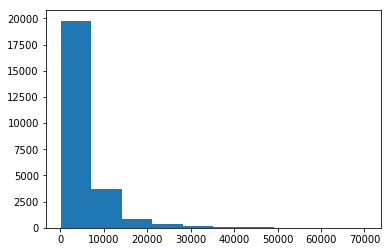

In [9]:
n, bins, patches = plt.hist(f['lepE'][ok_q2_idx])

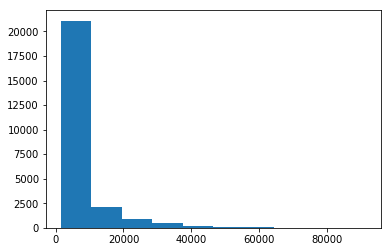

In [10]:
n, bins, patches = plt.hist(f['nuE'][ok_q2_idx])

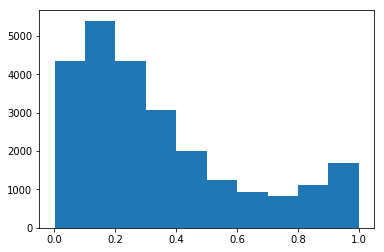

In [11]:
n, bins, patches = plt.hist(f['xbj'][ok_q2_idx])

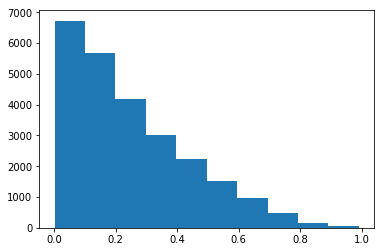

In [12]:
n, bins, patches = plt.hist(f['ybj'][ok_q2_idx])

In [2]:
REL_PATH = '../hdf5_manipulator/'

In [3]:
loww = h5py.File(REL_PATH + 'minosmatch_nukecczdefs_genallz_pcodecap66_kinedat_127x50x25_xuv_me1Bmc_lowW.hdf5', 'r')

In [4]:
highw = h5py.File(REL_PATH + 'minosmatch_nukecczdefs_genallz_pcodecap66_kinedat_127x50x25_xuv_me1Bmc_highW.hdf5', 'r')

In [5]:
allw = h5py.File(REL_PATH + 'minosmatch_nukecczdefs_genallz_pcodecap66_kinedat_127x50x25_xuv_me1Bmc.hdf5', 'r')

In [6]:
lowids = set(loww['eventids'][:])
highids = set(highw['eventids'][:])
overlap_ids = np.array(list(highids.intersection(lowids)))
print(overlap_ids)

[1122054581027302 1122004128040301 1122044737130001 1122042675001202
 1122052401045301 1122023078118201 1122011493136701]


In [7]:
for id in overlap_ids:
    print allw['W'][allw['eventids'][:] == id]

[ 2000.]
[ 2000.]
[ 2000.]
[ 2000.]
[ 2000.]
[ 2000.]
[ 2000.]


Sigh.

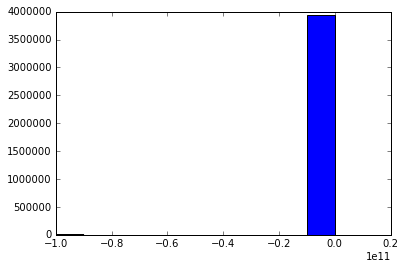

In [8]:
n, bins, patches = plt.hist(allw['Q2'][:])

In [11]:
ok_q2_idx = allw['Q2'][:] > 0.0

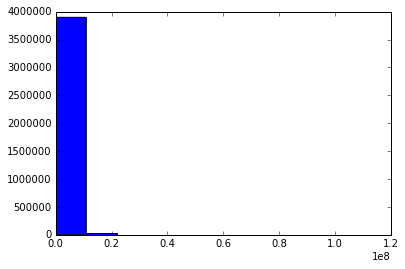

In [13]:
n, bins, patches = plt.hist(allw['Q2'][ok_q2_idx])

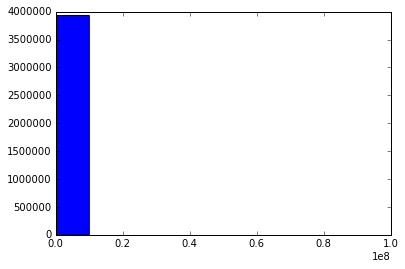

In [14]:
n, bins, patches = plt.hist(allw['W'][:])

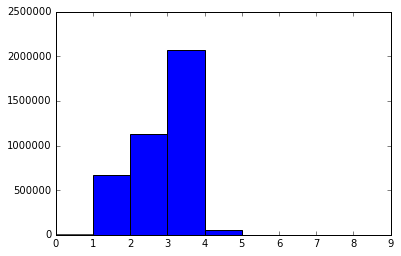

In [20]:
n, bins, patches = plt.hist(allw['int_type'][:], bins=np.arange(10))

In [21]:
print n

[  0.00000000e+00   6.74730000e+05   1.12452000e+06   2.07497800e+06
   5.65100000e+04   0.00000000e+00   2.34000000e+02   0.00000000e+00
   3.00000000e+00]


```
typedef enum EScatteringType {
  * == seen in the MC files...
0          kScNull = 0,
1    *     kScQuasiElastic,
2    *     kScDeepInelastic,
3    *     kScResonant,
4    *     kScCoherent,
5          kScDiffractive,
6    *     kScNuElectronElastic,
7          kScInverseMuDecay,
8    *     kScAMNuGamma,
9          kScMEC,
10         kScCoherentElas,
11         kScInverseBetaDecay,
12         kScGlashowResonance,
13         kScIMDAnnihilation
        } ScatteringType_t;
```

In [22]:
np.max(allw['int_type'][:])

8